<a href="https://colab.research.google.com/github/skimaza/assist/blob/main/perceptron_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 전략경영MBA 경영자를 위한 딥러닝 원리의 이해
# Perceptron 실습 예제
# 붓꽃 분류 문제

The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

# 라이브러리 import
- numpy: number, 특히 다차원 배열을 다루는 라이브러리(패키지)
- pandas: 데이터를 다양한 표 형태로 취급할 수 있는 패키지
- matplotlib: 이미지와 그래프 표시

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Colab으로 배정된 가상머신 확인

### 현재 디렉토리(폴더)
### '!'로 시작하는 명령은 가상머신의 명령을 실행하라는 의미

In [34]:
!pwd

/content


### 현재 디렉토리의 내용

In [35]:
!ls -l

total 12
-rw-r--r-- 1 root root 4551 Sep 22 01:24 iris.dat
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data


### sample_data directory에는 Google Colab에서 기본으로 제공하는 데이터가 있음
### (이번 특강에서 사용할 데이터는 아님)

In [36]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


# 예제 코드

In [37]:
weights = []
errors_log = []
epochs = 20
eta = 0.01

IRIS_DATA = "iris.dat" # Iris 데이터셋을 저장할 파일이름

### os는 운영체제 관련 기능, urllib는 인터넷으로 데이터를 다운로드받기 위한 패키지
### 인터넷에서 Iris 데이터셋을 다운로드하여 IRIS_DATA 파일에 저장

In [38]:
import os
from urllib.request import urlopen

if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [39]:
!ls -l

total 12
-rw-r--r-- 1 root root 4551 Sep 22 01:24 iris.dat
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data


# pandas의 read_csv 명령을 사용하여 데이터를 pandas DataFrame 구조로 읽어들임

In [40]:
df = pd.read_csv(IRIS_DATA, header=None)

In [41]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비 (cm), 붓꽃 종류

In [42]:
df[4].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [43]:
df.iloc[0:100, 4]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: 4, Length: 100, dtype: object

In [44]:
df.iloc[0:100, 4].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [45]:
# setosa and versicolor
y = np.asarray(df.iloc[0:100, 4].values)
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = np.asarray(df.iloc[0:100, [0,2]].values)

In [46]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [47]:
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [48]:
# Versicolor
pos = X[[y == 1]]
# Setosa
neg = X[[y == -1]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [49]:
print(pos)

[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.  3.3]
 [5.6 4.2]
 [5.7 4.2]
 [5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]]


In [50]:
print(neg)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]]


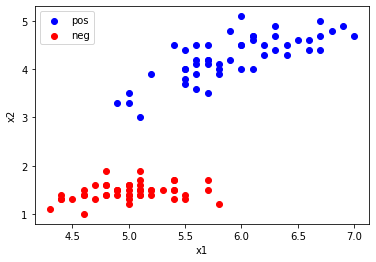

In [51]:
# versicolor with blue dots and setosa with red dots
plt.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
plt.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

In [52]:
def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            #print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                errors += int(update != 0.0)
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) > 0.0, 1, -1)

In [53]:
train(X, y)

Initial weights [0. 0. 0.]
EPOCHS 1
Updated WEIGHTS [0.02  0.14  0.094]
EPOCHS 2
Updated WEIGHTS [0.    0.038 0.066]
Updated WEIGHTS [-0.02  -0.06   0.038]
Updated WEIGHTS [0.    0.08  0.132]
EPOCHS 3
Updated WEIGHTS [-0.02  -0.022  0.104]
Updated WEIGHTS [-0.04  -0.12   0.076]
Updated WEIGHTS [-0.02  0.02  0.17]
EPOCHS 4
Updated WEIGHTS [-0.04  -0.082  0.142]
Updated WEIGHTS [-0.02   0.032  0.212]
EPOCHS 5
Updated WEIGHTS [-0.04  -0.07   0.184]
EPOCHS 6
EPOCHS 7
EPOCHS 8
EPOCHS 9
EPOCHS 10
EPOCHS 11
EPOCHS 12
EPOCHS 13
EPOCHS 14
EPOCHS 15
EPOCHS 16
EPOCHS 17
EPOCHS 18
EPOCHS 19
EPOCHS 20


In [54]:
print(errors_log)

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
print(weights)

[-0.04  -0.07   0.184]


$w_{1}x_{1} + w_{2}x_{2} + w_{0} = 0$  
$x_{2} = - \frac{w_{1}}{w_{2}}x_{1} - \frac{w_{0}}{w_{2}}$

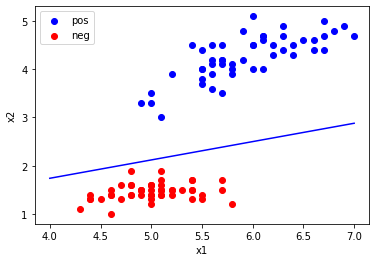

In [56]:

fig = plt.figure()
ax = fig.add_subplot(111)

# draw between 4 and 7 of x1
point_x = np.array([4, 7])
# x2 = -(w0 + w1 * x1) / w2
point_y = np.array([- (weights[0] + weights[1] * 4) / weights[2], - (weights[0] + weights[1] * 7) / weights[2]])
line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()